In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None


In [4]:

# Read the dataset
df = pd.read_csv("../Data_Lab/cardio_train.csv", sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## EDA

### Number of cases with cardiovascular dissease (Positive / Negative)

In [5]:
# Number of positive and negative cases

positive_cases = df[df['cardio'] == 1].shape[0]
negative_cases = df[df['cardio'] == 0].shape[0] 
# shape[0] to count the number of rows

print(f"Positive cases: {positive_cases}")
print(f"Negative cases: {negative_cases}")

Positive cases: 34979
Negative cases: 35021


### Cholesterol Levels

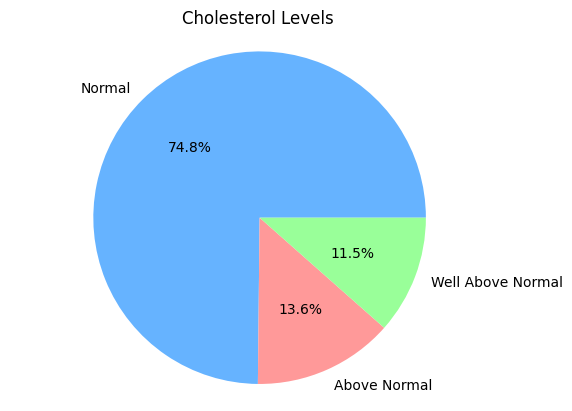

In [6]:
# Percentage of each cholesterol level
cholesterol_counts = df['cholesterol'].value_counts(normalize=True) * 100

# Pie chart
labels = ['Normal', 'Above Normal', 'Well Above Normal']
colors = ['#66b3ff', '#ff9999', '#99ff99']
plt.pie(cholesterol_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Cholesterol Levels')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Display the chart
plt.show()

### Age Distribution

- I will convert from days to years.

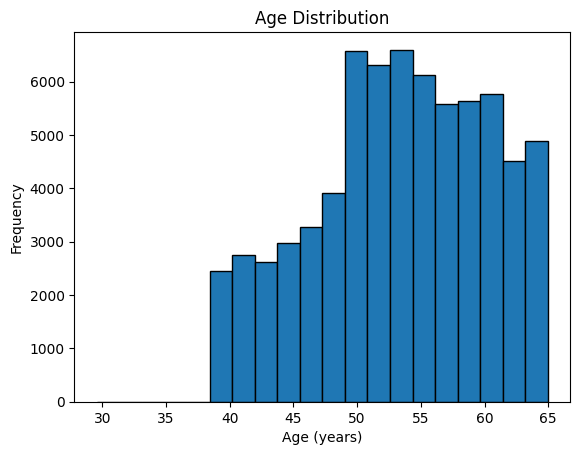

In [8]:
# Converts age from days to years
df['age_years'] = df['age'] / 365

# Histogram
plt.hist(df['age_years'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

# Display the chart
plt.show()

### Percentage of smokers

In [9]:
# Calculate the percentage of smokers
smoker_counts = df['smoke'].value_counts(normalize=True) * 100
percentage_smokers = smoker_counts[1]

print(f"Percentage of smokers: {percentage_smokers:.2f}%")

Percentage of smokers: 8.81%


### Weight and Height Distribution

- Here we notice some outliers.

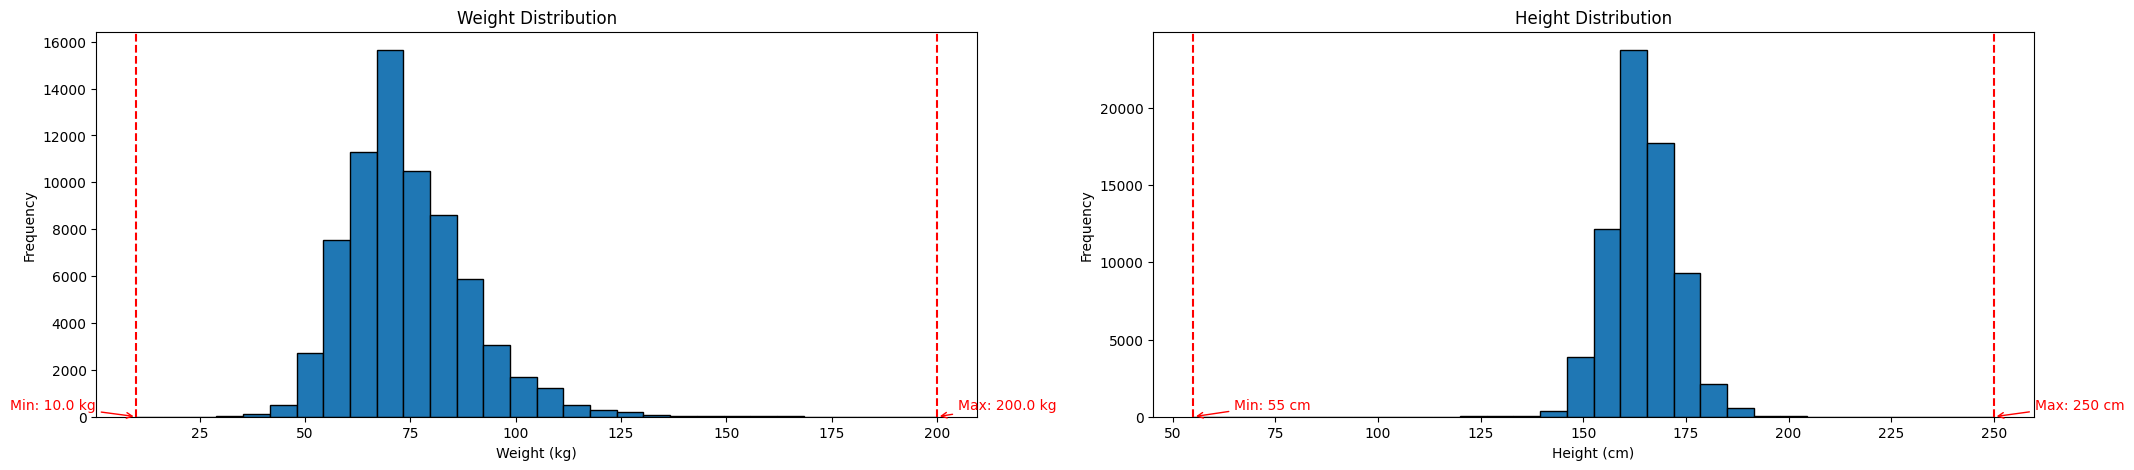

In [33]:
# Subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 5))


# -----------------------------------------
# Weight distribution Plot
ax1.hist(df['weight'], bins=30, edgecolor='black')
ax1.set_title('Weight Distribution')
ax1.set_xlabel('Weight (kg)')
ax1.set_ylabel('Frequency')

# Vertical lines and annotations for weight min and max
weight_min = df['weight'].min()
weight_max = df['weight'].max()
ax1.axvline(weight_min, color='red', linestyle='--')
ax1.axvline(weight_max, color='red', linestyle='--')
ax1.annotate(f'Min: {weight_min} kg', xy=(weight_min, 0), xytext=(weight_min-30, 300), color='red', arrowprops=dict(arrowstyle='->', color='red'))
ax1.annotate(f'Max: {weight_max} kg', xy=(weight_max, 0), xytext=(weight_max+5, 300), color='red', arrowprops=dict(arrowstyle='->', color='red'))



# -----------------------------------------
# Height distribution Plot
ax2.hist(df['height'], bins=30, edgecolor='black')
ax2.set_title('Height Distribution')
ax2.set_xlabel('Height (cm)')
ax2.set_ylabel('Frequency')


# Vertical lines and annotations for height min and max
height_min = df['height'].min()
height_max = df['height'].max()
ax2.axvline(height_min, color='red', linestyle='--')
ax2.axvline(height_max, color='red', linestyle='--')
ax2.annotate(f'Min: {height_min} cm', xy=(height_min, 0), xytext=(height_min+10, 500), color='red', arrowprops=dict(arrowstyle='->', color='red'))
ax2.annotate(f'Max: {height_max} cm', xy=(height_max, 0), xytext=(height_max+10, 500), color='red', arrowprops=dict(arrowstyle='->', color='red'))


plt.show()

## Feature Engineering
- A feature for Body Mass Index
- Remove outliers
- Create categorical BMI-feature with: normal range, overweight, obese (class 1), obese (class 2) and obese (class 3)

I will create a new column for body mass index called BMI and vizualize the outliers

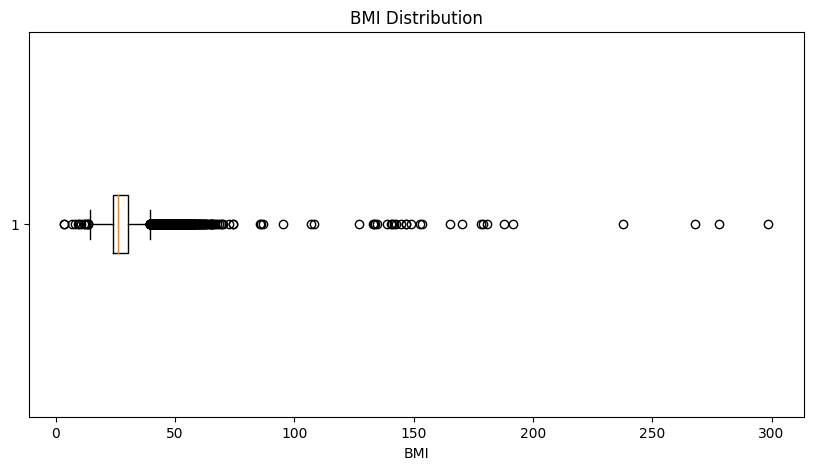

In [35]:
# Calculate BMI
df['BMI'] = df['weight'] / (df['height'] / 100)**2

# Create a box plot
plt.figure(figsize=(10, 5))
plt.boxplot(df['BMI'], vert=False)
plt.title('BMI Distribution')
plt.xlabel('BMI')

# Display the chart
plt.show()

We have some extreme outliers. According to wikipedia, these are the ranges of interest:

- Underweight (Severe thinness)	< 16.0
- Underweight (Moderate thinness)	16.0 – 16.9	
- Underweight (Mild thinness)	17.0 – 18.4	
- Normal range	18.5 – 24.9	
- Overweight (Pre-obese)	25.0 – 29.9	
- Obese (Class I)	30.0 – 34.9	
- Obese (Class II)	35.0 – 39.9	
- Obese (Class III)	≥ 40.0	

In [47]:
# Amount with BMI >= 40
above_40_count = (df['BMI'] >= 40).sum()

# Count the number of rows with BMI < 18.5
below_18_5_count = (df['BMI'] < 18.5).sum()

total_bmi = df['BMI'].count()

print(f"Number of rows with BMI < 18.5: {below_18_5_count}")
print(f"Number of rows with BMI >= 40: {above_40_count}")
print(f"Total: {total_bmi}")

Number of rows with BMI < 18.5: 650
Number of rows with BMI >= 40: 1886
Total: 70000


In [48]:
total_rows = 70000

# Calculate the percentages
below_18_5_percentage = (below_18_5_count / total_rows) * 100
above_40_percentage = (above_40_count / total_rows) * 100

print(f"Percentage of rows with BMI < 18.5: {below_18_5_percentage:.2f}%")
print(f"Percentage of rows with BMI >= 40: {above_40_percentage:.2f}%")

Percentage of rows with BMI < 18.5: 0.93%
Percentage of rows with BMI >= 40: 2.69%


The percentage below the normal range and above obese class 3 is below 4% so I will discard those values. It is a small amount and should be ok to remove.

In [52]:
# Filter the dataset based on BMI ranges of interest
filtered_data = df[
    (df['BMI'] >= 18.5) &
    (df['BMI'] <= 40.0)
]

# Calculate the number of rows removed
removed_rows = len(df) - len(filtered_data)

print(f"Original dataset size: {len(df)}")
print(f"Filtered dataset size: {len(filtered_data)}")
print(f"Removed {removed_rows} rows due to BMI outliers")

Original dataset size: 70000
Filtered dataset size: 67478
Removed 2522 rows due to BMI outliers


Double check to see if it is still close to 50% ( Positive / Negative ) disease. 

In [56]:
# Number of positive and negative cases

positive_cases_filtered = filtered_data[filtered_data['cardio'] == 1].shape[0]
negative_cases_filtered = filtered_data[filtered_data['cardio'] == 0].shape[0] 

print(f"Positive cases filtered data: {positive_cases_filtered}")
print(f"Negative cases filtered data: {negative_cases_filtered}")

Positive cases filtered data: 33508
Negative cases filtered data: 33970


In [68]:
# Categorical feature  by using pd.cut. Segment and sort data values into bins
# https://pandas.pydata.org/docs/reference/api/pandas.cut.html

# Define the categories and their corresponding BMI ranges
bmi_categories = ['Normal range', 'Overweight (Pre-obese)', 'Obese (Class I)', 'Obese (Class II)', 'Obese (Class III)']
bmi_ranges = [18.5, 24.9, 29.9, 34.9, 39.9, filtered_data['BMI'].max()]

# Categorical BMI feature using pd.cut()
filtered_data['BMI_category'] = pd.cut(filtered_data['BMI'], bins=bmi_ranges, labels=bmi_categories, include_lowest=True)

# Check
filtered_data.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120,Normal range
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679,Obese (Class II)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805,Normal range
